**<font size=9px> Downlowds and Installations**



In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install -U ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 21.4 MB/s eta 0:00:00


In [2]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import torch

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
torch.cuda.is_available()

True

In [13]:
import scipy.io as sio
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy

<font size = 12px>***Data exploration***

In [14]:
flower_names = os.listdir('drive/MyDrive/102flowers/images')
flower_names.sort(reverse=True)
flower_names.reverse()
for i in flower_names:
  if(i.endswith('(1).jpg')):
    flower_names.remove(i)
flower_labels = sio.loadmat('imagelabels.mat')
labels = np.transpose(flower_labels['labels'])
print(len(labels))
print(len(flower_names))
flower_classes = []
for i in range(len(labels)):
    flower_classes.append((flower_names[i],labels[i][0]))
flowers = pd.DataFrame(flower_classes, columns = ['fnames','class'])
print(flower_names)

8189
8189
['image_00001.jpg', 'image_00002.jpg', 'image_00003.jpg', 'image_00004.jpg', 'image_00005.jpg', 'image_00006.jpg', 'image_00007.jpg', 'image_00008.jpg', 'image_00009.jpg', 'image_00010.jpg', 'image_00011.jpg', 'image_00012.jpg', 'image_00013.jpg', 'image_00014.jpg', 'image_00015.jpg', 'image_00016.jpg', 'image_00017.jpg', 'image_00018.jpg', 'image_00019.jpg', 'image_00020.jpg', 'image_00021.jpg', 'image_00022.jpg', 'image_00023.jpg', 'image_00024.jpg', 'image_00025.jpg', 'image_00026.jpg', 'image_00027.jpg', 'image_00028.jpg', 'image_00029.jpg', 'image_00030.jpg', 'image_00031.jpg', 'image_00032.jpg', 'image_00033.jpg', 'image_00034.jpg', 'image_00035.jpg', 'image_00036.jpg', 'image_00037.jpg', 'image_00038.jpg', 'image_00039.jpg', 'image_00040.jpg', 'image_00041.jpg', 'image_00042.jpg', 'image_00043.jpg', 'image_00044.jpg', 'image_00045.jpg', 'image_00046.jpg', 'image_00047.jpg', 'image_00048.jpg', 'image_00049.jpg', 'image_00050.jpg', 'image_00051.jpg', 'image_00052.jpg', '

In [15]:
flowers

,fnames,class
0,image_00001.jpg,77
1,image_00002.jpg,77
2,image_00003.jpg,77
3,image_00004.jpg,77
4,image_00005.jpg,77
...,...,...
8184,image_08185.jpg,62
8185,image_08186.jpg,62
8186,image_08187.jpg,62
8187,image_08188.jpg,62


In [16]:
flowers['class'].value_counts()

51    258
77    251
46    196
73    194
89    184
     ... 
7      40
45     40
34     40
1      40
27     40
Name: class, Length: 102, dtype: int64

In [17]:
flowers['class'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8184    False
8185    False
8186    False
8187    False
8188    False
Name: class, Length: 8189, dtype: bool

In [18]:
first_label = flowers.loc[flowers['class'] == 51]

In [19]:
first_label

,fnames,class
1313,image_01314.jpg,51
1314,image_01315.jpg,51
1315,image_01316.jpg,51
1316,image_01317.jpg,51
1317,image_01318.jpg,51
...,...,...
3988,image_03989.jpg,51
3989,image_03990.jpg,51
3990,image_03991.jpg,51
3991,image_03992.jpg,51


500
591
3
0    77
Name: class, dtype: uint8


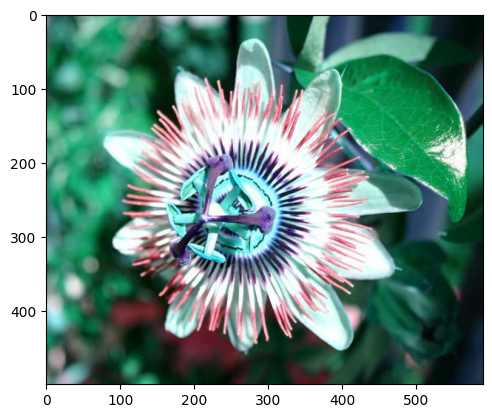

In [20]:
im = cv2.imread("drive/MyDrive/102flowers/images/image_00001.jpg")
plt.imshow(im)
w, h, ch = im.shape
print(w)
print(h)
print(ch)
print(flowers.loc[flowers['fnames'] == 'image_00001.jpg']['class'])

500
527
3
3991    51
Name: class, dtype: uint8
[51]
<class 'pandas.core.series.Series'>


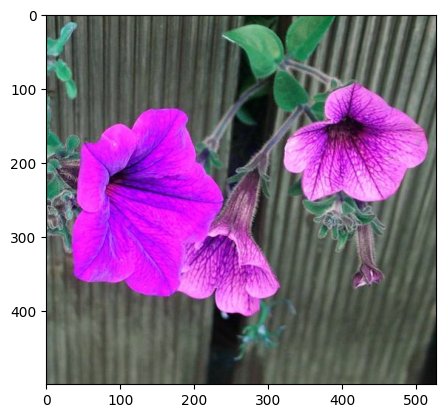

In [21]:
im = cv2.imread("drive/MyDrive/102flowers/images/image_03992.jpg")
plt.imshow(im)
w, h, ch = im.shape
print(w)
print(h)
print(ch)
print(flowers.loc[flowers['fnames'] == 'image_03992.jpg']['class'])
print(flowers.loc[flowers['fnames'] == 'image_03992.jpg']['class'].values)
print(type(flowers.loc[flowers['fnames'] == 'image_03992.jpg']['class']))

In [3]:
import torch
from torch.utils.data import Dataset,DataLoader, ConcatDataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.io import read_image
import pathlib
from torchvision import transforms
from PIL import Image
import random
from sklearn.model_selection import train_test_split

In [27]:
# First random split
train_df, remaining_df = train_test_split(flowers, train_size=0.5, random_state=42)
validation_df, test_df = train_test_split(remaining_df, train_size=0.5, random_state=43)

# Second random split
train_df2, remaining_df2 = train_test_split(flowers, train_size=0.5, random_state=44)
validation_df2, test_df2 = train_test_split(remaining_df2, train_size=0.5, random_state=45)

In [28]:
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
train_df2 = train_df2.reset_index(drop=True)
validation_df2 = validation_df2.reset_index(drop=True)
test_df2 = test_df2.reset_index(drop=True)

In [29]:
train_df

,fnames,class
0,image_02653.jpg,58
1,image_06842.jpg,24
2,image_07925.jpg,100
3,image_02177.jpg,75
4,image_07084.jpg,67
...,...,...
4089,image_05227.jpg,28
4090,image_05391.jpg,22
4091,image_00861.jpg,81
4092,image_07604.jpg,96


In [30]:
class FlowersDataset(Dataset):
  def __init__(self,target_dir,classes,transform=None):
    self.path_to_imgs = target_dir
    self.transform = transform
    self.classes_df = classes
  def __len__(self):
    return len(self.classes_df)
  def load_image(self,idx):
    path_to_imgs = os.path.join(self.path_to_imgs,self.classes_df.iloc[idx,0])
    return Image.open(path_to_imgs)

  def __getitem__(self,idx):
    img = self.load_image(idx)
    class_idx = self.classes_df.iloc[idx,1] - 1
    if(self.transform):
      return self.transform(img),class_idx
    else:
      return img,class_idx



In [31]:
from torchvision.transforms import transforms
train_transforms = transforms.Compose([
                                        transforms.Resize(size=(224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.RandomVerticalFlip(p=0.3),
                                        transforms.RandomGrayscale()
                                      ])
test_transforms = transforms.Compose([
                                        transforms.Resize(size=(224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])

In [32]:
flower_dir = 'drive/MyDrive/102flowers/images'

In [33]:

train_dataset =FlowersDataset(target_dir = flower_dir , classes = train_df, transform = train_transforms)

val_dataset =FlowersDataset(target_dir = flower_dir, classes = validation_df, transform = test_transforms)

test_dataset = FlowersDataset(target_dir = flower_dir,classes = test_df,  transform = test_transforms)

In [34]:
train_dataset[0]

(tensor([[[-1.4693, -1.5084, -1.4993,  ..., -1.5839, -1.6668, -1.7344],
          [-1.4796, -1.5187, -1.5167,  ..., -1.5665, -1.6668, -1.7292],
          [-1.5309, -1.5483, -1.5657,  ..., -1.5736, -1.6546, -1.7048],
          ...,
          [-1.9488, -1.9662, -1.9855,  ..., -1.9302, -1.9119, -1.4170],
          [-1.9271, -1.9547, -2.0009,  ..., -1.9836, -1.9527, -1.9119],
          [-1.9117, -1.9445, -1.9773,  ..., -1.9694, -1.9455, -1.9753]],
 
         [[-1.4693, -1.5084, -1.4993,  ..., -1.5839, -1.6668, -1.7344],
          [-1.4796, -1.5187, -1.5167,  ..., -1.5665, -1.6668, -1.7292],
          [-1.5309, -1.5483, -1.5657,  ..., -1.5736, -1.6546, -1.7048],
          ...,
          [-1.9488, -1.9662, -1.9855,  ..., -1.9302, -1.9119, -1.4170],
          [-1.9271, -1.9547, -2.0009,  ..., -1.9836, -1.9527, -1.9119],
          [-1.9117, -1.9445, -1.9773,  ..., -1.9694, -1.9455, -1.9753]],
 
         [[-1.4693, -1.5084, -1.4993,  ..., -1.5839, -1.6668, -1.7344],
          [-1.4796, -1.5187,

In [35]:
val_dataset[0]

(tensor([[[-1.6555, -1.6727, -1.6213,  ..., -2.1008, -2.1008, -2.1008],
          [-1.6555, -1.6727, -1.6727,  ..., -2.1008, -2.1008, -2.1008],
          [-1.6384, -1.6384, -1.6384,  ..., -2.1008, -2.1008, -2.1008],
          ...,
          [-1.6555, -1.6898, -1.6727,  ..., -2.1008, -2.1008, -2.1008],
          [-1.6555, -1.6727, -1.6898,  ..., -2.1008, -2.1008, -2.1008],
          [-1.6555, -1.6727, -1.6727,  ..., -2.1008, -2.1008, -2.1008]],
 
         [[-1.5805, -1.5980, -1.5455,  ..., -2.0182, -2.0182, -2.0182],
          [-1.5805, -1.5980, -1.5980,  ..., -2.0182, -2.0182, -2.0182],
          [-1.5630, -1.5630, -1.5630,  ..., -2.0182, -2.0182, -2.0182],
          ...,
          [-1.5630, -1.5980, -1.5805,  ..., -2.0182, -2.0182, -2.0182],
          [-1.5630, -1.5805, -1.5980,  ..., -2.0182, -2.0182, -2.0182],
          [-1.5630, -1.5805, -1.5805,  ..., -2.0182, -2.0182, -2.0182]],
 
         [[-1.4210, -1.4384, -1.3861,  ..., -1.7522, -1.7522, -1.7522],
          [-1.4210, -1.4384,

In [36]:
test_dataset[0]

(tensor([[[-2.1008, -1.9638, -1.6555,  ..., -1.5014, -1.5185, -1.5357],
          [-2.0665, -1.8953, -1.5699,  ..., -1.3815, -1.3987, -1.4158],
          [-2.0665, -1.8439, -1.4672,  ..., -1.2788, -1.2959, -1.2959],
          ...,
          [-1.4672, -1.4672, -1.4500,  ..., -0.9363, -0.9363, -0.9705],
          [-1.3815, -1.3987, -1.3987,  ..., -0.9363, -0.9363, -0.9192],
          [-1.3473, -1.3644, -1.3644,  ..., -0.9363, -0.9363, -0.9192]],
 
         [[-1.6331, -1.2479, -0.6176,  ..., -0.2675, -0.2850, -0.2850],
          [-1.5630, -1.1429, -0.4951,  ..., -0.0924, -0.1099, -0.1450],
          [-1.4755, -1.0203, -0.3550,  ...,  0.0301,  0.0126,  0.0126],
          ...,
          [-0.2150, -0.2150, -0.1975,  ...,  0.4853,  0.4328,  0.3452],
          [-0.1800, -0.1450, -0.1275,  ...,  0.4678,  0.4678,  0.4678],
          [-0.1450, -0.1099, -0.1099,  ...,  0.4678,  0.4678,  0.4853]],
 
         [[-1.6999, -1.7522, -1.7173,  ..., -1.6999, -1.7173, -1.7173],
          [-1.7173, -1.7347,

In [37]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from torch import nn
from torchinfo import summary

In [39]:
vgg_model = models.vgg19(pretrained=True)
for param in vgg_model.parameters():
    param.requires_grad = False

num_features = vgg_model.classifier[-1].in_features
print(num_features)
# Replace the last layer with a new linear layer
vgg_model.classifier[-1] = torch.nn.Linear(num_features, 102)
vgg_model = vgg_model.to(device)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_fixed_feature, step_size=7, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:05<00:00, 99.6MB/s]


4096


In [40]:
summary(vgg_model,input_size=(32,3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [32, 102]                 --
├─Sequential: 1-1                        [32, 512, 7, 7]           --
│    └─Conv2d: 2-1                       [32, 64, 224, 224]        (1,792)
│    └─ReLU: 2-2                         [32, 64, 224, 224]        --
│    └─Conv2d: 2-3                       [32, 64, 224, 224]        (36,928)
│    └─ReLU: 2-4                         [32, 64, 224, 224]        --
│    └─MaxPool2d: 2-5                    [32, 64, 112, 112]        --
│    └─Conv2d: 2-6                       [32, 128, 112, 112]       (73,856)
│    └─ReLU: 2-7                         [32, 128, 112, 112]       --
│    └─Conv2d: 2-8                       [32, 128, 112, 112]       (147,584)
│    └─ReLU: 2-9                         [32, 128, 112, 112]       --
│    └─MaxPool2d: 2-10                   [32, 128, 56, 56]         --
│    └─Conv2d: 2-11                      [32, 256, 56, 56]   

In [41]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=True)

In [63]:
def train_loop(data_loader,model,device,loss_fn,optimizer,print_every_n=10):
    model.train()
    size = len(data_loader.dataset)
    num_batches = len(data_loader)
    train_loss=0
    tp=0
    for batch,(X,y) in enumerate(data_loader):
        X = X.to(device)
        y = y.to(dtype=torch.long)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred,y)
        train_loss += loss
        tp += (y==pred.argmax(1)).type(torch.float).sum().item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%print_every_n==0:
            loss, current = loss.item(), batch*len(X)
            print(f'loss={loss:.3f}, {current} samples / {size}')

    train_loss /= num_batches
    train_acc = tp/size

    return train_loss,train_acc


In [43]:
def val_loop(data_loader,model,device,loss_fn):
    model.eval()
    size=len(data_loader.dataset)
    num_batches = len(data_loader)
    test_loss=0
    tp=0
    with torch.no_grad():
        for X,y in data_loader:
            X = X.to(device)
            y = y.to(dtype=torch.long)
            y = y.to(device)
            pred = model(X)
            y_pred = pred.argmax(1)
            test_loss += loss_fn(pred,y).item()
            tp += (y==y_pred).type(torch.float).sum().item()

    test_loss /= num_batches
    test_acc = tp/size
    print(f'accuracy = {test_acc}, test_loss = {test_loss:2f}')
    return test_loss,test_acc
def reset_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

In [44]:
def test_loop(data_loader,model,device,loss_fn):
    model.eval()
    y_pred_list =[]
    y_true_list = []
    size=len(data_loader.dataset)
    num_batches = len(data_loader)
    test_loss=0
    tp=0
    with torch.no_grad():
        for X,y in data_loader:
            X = X.to(device)
            y = y.to(dtype=torch.long)
            y = y.to(device)
            pred = model(X)
            y_pred = pred.argmax(1)
            y_pred_list.extend(y_pred.cpu().numpy())
            y_true_list.extend(y.cpu().numpy())
            test_loss += loss_fn(pred,y).item()
            tp += (y==y_pred).type(torch.float).sum().item()

    test_loss /= num_batches
    test_acc = tp/size
    print(f'accuracy = {test_acc}, test_loss = {test_loss:2f}')
    return test_loss,test_acc , y_pred_list , y_true_list

In [45]:
prefreeze_history = {'train_loss': [], 'val_loss': [],'train_acc':[],'val_acc':[]}
epochs = 14
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(vgg_model.parameters(),lr=learning_rate)

for epoch in range(epochs):

        print(f'Starting epoch {epoch+1}')

        train_epoch_loss,train_epoch_acc = train_loop(train_loader,vgg_model,device,criterion,optimizer)
        prefreeze_history['train_loss'].append(train_epoch_loss.detach().cpu().numpy())
        prefreeze_history['train_acc'].append(train_epoch_acc)
        val_loss,val_acc = val_loop(val_loader,vgg_model,device,criterion)
        print("Epoch:{}/{} AVG Training Loss:{:.3f} AVG Val Loss:{:.3f} AVG Training Acc {:.4f} % AVG Val Acc {:.4f} %".format(epoch + 1,
                                                                                                         epochs,
                                                                                                         train_epoch_loss,
                                                                                                         val_loss,
                                                                                                         train_epoch_acc,
                                                                                                         val_acc))
        prefreeze_history['val_loss'].append(val_loss)
        prefreeze_history['val_acc'].append(val_acc)

Starting epoch 1
loss=4.704, 0 samples / 4094
loss=4.634, 320 samples / 4094
loss=4.414, 640 samples / 4094
loss=4.351, 960 samples / 4094
loss=4.093, 1280 samples / 4094
loss=4.092, 1600 samples / 4094
loss=3.810, 1920 samples / 4094
loss=3.715, 2240 samples / 4094
loss=3.859, 2560 samples / 4094
loss=3.650, 2880 samples / 4094
loss=3.511, 3200 samples / 4094
loss=3.534, 3520 samples / 4094
loss=3.543, 3840 samples / 4094
accuracy = 0.3488031265266243, test_loss = 3.341987
Epoch:1/14 AVG Training Loss:3.977 AVG Val Loss:3.342 AVG Training Acc 0.1419 % AVG Val Acc 0.3488 %
Starting epoch 2
loss=3.260, 0 samples / 4094
loss=3.223, 320 samples / 4094
loss=2.883, 640 samples / 4094
loss=3.275, 960 samples / 4094
loss=2.734, 1280 samples / 4094
loss=3.018, 1600 samples / 4094
loss=2.677, 1920 samples / 4094
loss=2.860, 2240 samples / 4094
loss=2.751, 2560 samples / 4094
loss=2.834, 2880 samples / 4094
loss=2.670, 3200 samples / 4094
loss=2.780, 3520 samples / 4094
loss=2.688, 3840 samples 

In [46]:
def plot_acc_loss(history):
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    ax[0].plot(history['train_acc'])
    ax[0].plot(history['val_acc'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    ax[1].plot(history['train_loss'])
    ax[1].plot(history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [47]:
prefreeze_history = pd.DataFrame(prefreeze_history)
prefreeze_history

,train_loss,val_loss,train_acc,val_acc
0,3.9771852,3.341987,0.141915,0.348803
1,2.9587471,2.684094,0.372985,0.498779
2,2.4199631,2.281922,0.505129,0.590620
3,2.0730245,2.020067,0.592574,0.628725
4,1.8455234,1.823801,0.623107,0.657059
5,1.6629335,1.686553,0.654617,0.675623
6,1.5451925,1.577404,0.669272,0.694187
7,1.4321262,1.483860,0.703224,0.695652
8,1.3331256,1.413116,0.712995,0.706400
9,1.2794402,1.349872,0.717880,0.721055


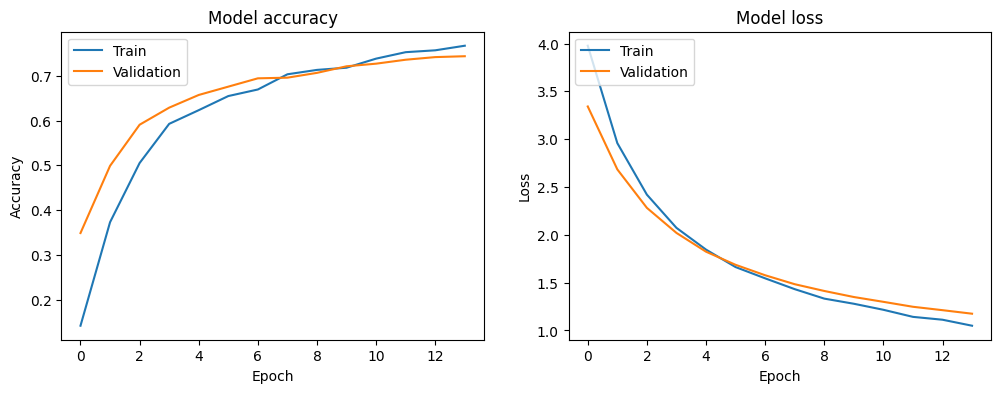

In [48]:
plot_acc_loss(prefreeze_history)

In [49]:
for param in vgg_model.parameters():
    param.requires_grad = True

In [50]:
postfreeze_history = {'train_loss': [], 'val_loss': [],'train_acc':[],'val_acc':[]}
epochs = 20
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(vgg_model.parameters(),lr=learning_rate)
for epoch in range(epochs):

        print(f'Starting epoch {epoch+1}')

        train_epoch_loss,train_epoch_acc = train_loop(train_loader,vgg_model,device,criterion,optimizer)
        val_loss,val_acc = val_loop(val_loader,vgg_model,device,criterion)
        print("Epoch:{}/{} AVG Training Loss:{:.3f} AVG Val Loss:{:.3f} AVG Training Acc {:.4f} % AVG Val Acc {:.4f} %".format(epoch + 1,
                                                                                                         epochs,
                                                                                                         train_epoch_loss,
                                                                                                         val_loss,
                                                                                                         train_epoch_acc,
                                                                                                         val_acc))
        postfreeze_history['train_loss'].append(train_epoch_loss.detach().cpu().numpy())
        postfreeze_history['train_acc'].append(train_epoch_acc)
        postfreeze_history['val_loss'].append(val_loss)
        postfreeze_history['val_acc'].append(val_acc)

Starting epoch 1
loss=0.848, 0 samples / 4094
loss=1.467, 320 samples / 4094
loss=1.482, 640 samples / 4094
loss=1.384, 960 samples / 4094
loss=1.177, 1280 samples / 4094
loss=1.133, 1600 samples / 4094
loss=0.850, 1920 samples / 4094
loss=0.797, 2240 samples / 4094
loss=0.803, 2560 samples / 4094
loss=1.060, 2880 samples / 4094
loss=1.065, 3200 samples / 4094
loss=1.204, 3520 samples / 4094
loss=0.675, 3840 samples / 4094
accuracy = 0.7523204689789936, test_loss = 0.857173
Epoch:1/20 AVG Training Loss:1.135 AVG Val Loss:0.857 AVG Training Acc 0.6954 % AVG Val Acc 0.7523 %
Starting epoch 2
loss=0.859, 0 samples / 4094
loss=0.496, 320 samples / 4094
loss=0.631, 640 samples / 4094
loss=0.369, 960 samples / 4094
loss=0.619, 1280 samples / 4094
loss=0.451, 1600 samples / 4094
loss=0.417, 1920 samples / 4094
loss=0.808, 2240 samples / 4094
loss=0.452, 2560 samples / 4094
loss=0.471, 2880 samples / 4094
loss=0.415, 3200 samples / 4094
loss=0.610, 3520 samples / 4094
loss=0.460, 3840 samples 

In [55]:
postfreeze_history = pd.DataFrame(postfreeze_history)
postfreeze_history

,train_loss,val_loss,train_acc,val_acc
0,1.1352534,0.857173,0.695408,0.752320
1,0.61119354,0.769431,0.814362,0.802149
2,0.51028097,0.498652,0.846605,0.865657
3,0.3332409,0.436188,0.901075,0.881778
4,0.29969573,0.570958,0.908403,0.841720
5,0.27360564,0.403700,0.920371,0.893503
6,0.21190707,0.421682,0.935027,0.894968
7,0.19251499,0.477421,0.945286,0.881778
8,0.24396501,0.416494,0.931607,0.892037
9,0.17028603,0.448794,0.944064,0.892526


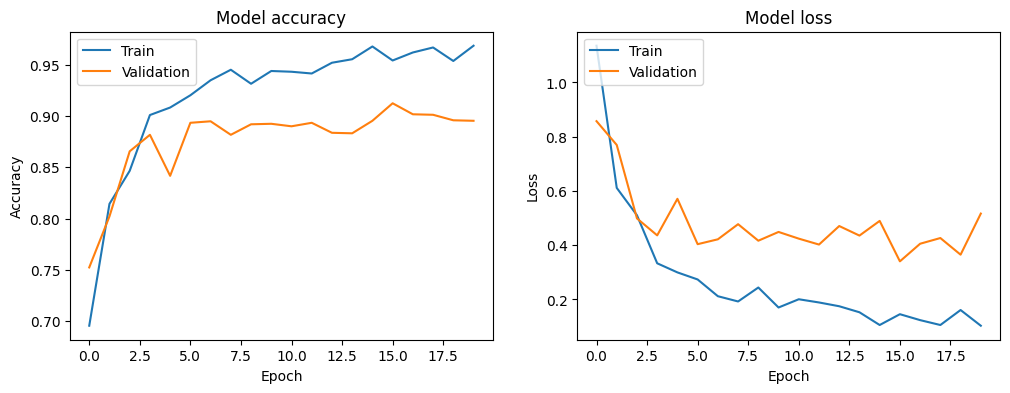

In [56]:
plot_acc_loss(postfreeze_history)

In [58]:
test_loss,test_acc , y_pred_list , y_true_list=test_loop(test_loader,vgg_model,device,criterion)
print("test loss : " + str(test_loss))
print("test accuracy : " + str(test_acc))

accuracy = 0.9033203125, test_loss = 0.369122
test loss : 0.3691219142638147
test accuracy : 0.9033203125


In [59]:
vgg_model = models.vgg19(pretrained=True)
for param in vgg_model.parameters():
    param.requires_grad = False

num_features = vgg_model.classifier[-1].in_features
print(num_features)
# Replace the last layer with a new linear layer
vgg_model.classifier[-1] = torch.nn.Linear(num_features, 102)
vgg_model = vgg_model.to(device)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_fixed_feature, step_size=7, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


4096


In [60]:

train_dataset =FlowersDataset(target_dir = flower_dir , classes = train_df2, transform = train_transforms)

val_dataset =FlowersDataset(target_dir = flower_dir, classes = validation_df2, transform = test_transforms)

test_dataset = FlowersDataset(target_dir = flower_dir,classes = test_df2,  transform = test_transforms)

In [66]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=True)

In [67]:
prefreeze_history = {'train_loss': [], 'val_loss': [],'train_acc':[],'val_acc':[]}
epochs = 14
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(vgg_model.parameters(),lr=learning_rate)

for epoch in range(epochs):

        print(f'Starting epoch {epoch+1}')

        train_epoch_loss,train_epoch_acc = train_loop(train_loader,vgg_model,device,criterion,optimizer)
        prefreeze_history['train_loss'].append(train_epoch_loss.detach().cpu().numpy())
        prefreeze_history['train_acc'].append(train_epoch_acc)
        val_loss,val_acc = val_loop(val_loader,vgg_model,device,criterion)
        print("Epoch:{}/{} AVG Training Loss:{:.3f} AVG Val Loss:{:.3f} AVG Training Acc {:.4f} % AVG Val Acc {:.4f} %".format(epoch + 1,
                                                                                                         epochs,
                                                                                                         train_epoch_loss,
                                                                                                         val_loss,
                                                                                                         train_epoch_acc,
                                                                                                         val_acc))
        prefreeze_history['val_loss'].append(val_loss)
        prefreeze_history['val_acc'].append(val_acc)

Starting epoch 1
loss=2.670, 0 samples / 4094
loss=2.799, 320 samples / 4094
loss=3.055, 640 samples / 4094
loss=2.514, 960 samples / 4094
loss=2.378, 1280 samples / 4094
loss=3.216, 1600 samples / 4094
loss=2.004, 1920 samples / 4094
loss=2.469, 2240 samples / 4094
loss=2.895, 2560 samples / 4094
loss=2.405, 2880 samples / 4094
loss=2.358, 3200 samples / 4094
loss=1.990, 3520 samples / 4094
loss=2.364, 3840 samples / 4094
accuracy = 0.5446995603321935, test_loss = 2.153145
Epoch:1/14 AVG Training Loss:2.423 AVG Val Loss:2.153 AVG Training Acc 0.4494 % AVG Val Acc 0.5447 %
Starting epoch 2
loss=1.856, 0 samples / 4094
loss=2.209, 320 samples / 4094
loss=1.706, 640 samples / 4094
loss=2.075, 960 samples / 4094
loss=2.145, 1280 samples / 4094
loss=2.068, 1600 samples / 4094
loss=1.896, 1920 samples / 4094
loss=1.712, 2240 samples / 4094
loss=1.487, 2560 samples / 4094
loss=2.415, 2880 samples / 4094
loss=1.631, 3200 samples / 4094
loss=2.180, 3520 samples / 4094
loss=1.657, 3840 samples 

In [68]:
prefreeze_history = pd.DataFrame(prefreeze_history)
prefreeze_history

,train_loss,val_loss,train_acc,val_acc
0,2.4227233,2.153145,0.449438,0.544700
1,1.9416875,1.860534,0.550318,0.608696
2,1.7259675,1.691891,0.603078,0.647289
3,1.5477834,1.573111,0.655838,0.669761
4,1.4594688,1.475289,0.657059,0.691744
5,1.3436091,1.398963,0.691011,0.701026
6,1.2698959,1.336846,0.707621,0.710308
7,1.2223326,1.287197,0.713727,0.714704
8,1.1746789,1.239756,0.723986,0.732780
9,1.1167656,1.198918,0.739130,0.736199


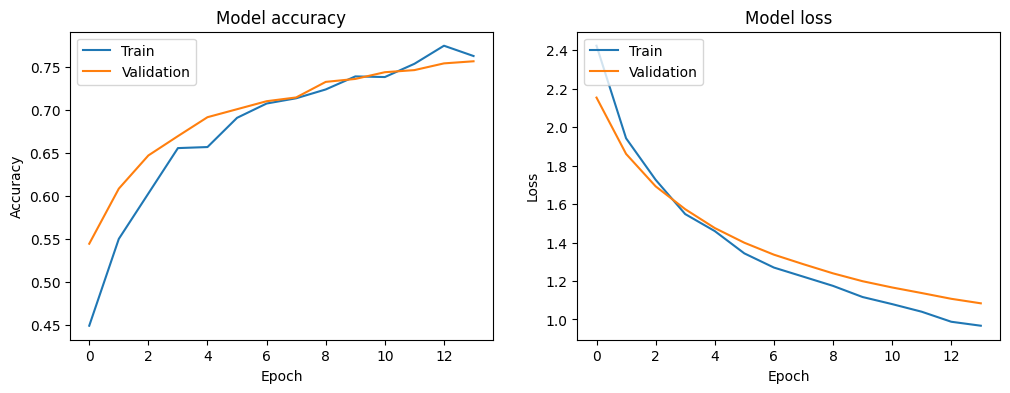

In [69]:
plot_acc_loss(prefreeze_history)

In [70]:
for param in vgg_model.parameters():
    param.requires_grad = True

In [71]:
postfreeze_history = {'train_loss': [], 'val_loss': [],'train_acc':[],'val_acc':[]}
epochs = 20
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(vgg_model.parameters(),lr=learning_rate)
for epoch in range(epochs):

        print(f'Starting epoch {epoch+1}')

        train_epoch_loss,train_epoch_acc = train_loop(train_loader,vgg_model,device,criterion,optimizer)
        val_loss,val_acc = val_loop(val_loader,vgg_model,device,criterion)
        print("Epoch:{}/{} AVG Training Loss:{:.3f} AVG Val Loss:{:.3f} AVG Training Acc {:.4f} % AVG Val Acc {:.4f} %".format(epoch + 1,
                                                                                                         epochs,
                                                                                                         train_epoch_loss,
                                                                                                         val_loss,
                                                                                                         train_epoch_acc,
                                                                                                         val_acc))
        postfreeze_history['train_loss'].append(train_epoch_loss.detach().cpu().numpy())
        postfreeze_history['train_acc'].append(train_epoch_acc)
        postfreeze_history['val_loss'].append(val_loss)
        postfreeze_history['val_acc'].append(val_acc)

Starting epoch 1
loss=0.976, 0 samples / 4094
loss=1.503, 320 samples / 4094
loss=1.503, 640 samples / 4094
loss=1.237, 960 samples / 4094
loss=1.147, 1280 samples / 4094
loss=1.402, 1600 samples / 4094
loss=1.057, 1920 samples / 4094
loss=0.699, 2240 samples / 4094
loss=1.447, 2560 samples / 4094
loss=1.240, 2880 samples / 4094
loss=0.563, 3200 samples / 4094
loss=1.199, 3520 samples / 4094
loss=0.808, 3840 samples / 4094
accuracy = 0.7801660967269174, test_loss = 0.746981
Epoch:1/20 AVG Training Loss:1.125 AVG Val Loss:0.747 AVG Training Acc 0.6812 % AVG Val Acc 0.7802 %
Starting epoch 2
loss=0.376, 0 samples / 4094
loss=0.523, 320 samples / 4094
loss=0.932, 640 samples / 4094
loss=0.372, 960 samples / 4094
loss=1.248, 1280 samples / 4094
loss=1.156, 1600 samples / 4094
loss=0.849, 1920 samples / 4094
loss=0.969, 2240 samples / 4094
loss=0.565, 2560 samples / 4094
loss=0.470, 2880 samples / 4094
loss=0.544, 3200 samples / 4094
loss=0.458, 3520 samples / 4094
loss=0.606, 3840 samples 

In [72]:
postfreeze_history = pd.DataFrame(postfreeze_history)
postfreeze_history

,train_loss,val_loss,train_acc,val_acc
0,1.125253,0.746981,0.681241,0.780166
1,0.6322427,0.629924,0.813630,0.826087
2,0.46545273,0.436649,0.857841,0.881290
3,0.35322332,0.441650,0.893747,0.884221
4,0.28466573,0.411630,0.916463,0.893014
5,0.24393487,0.413450,0.925501,0.888617
6,0.2546506,0.544715,0.919394,0.867123
7,0.21275622,0.497027,0.936004,0.867123
8,0.20532332,0.531130,0.937225,0.864191
9,0.2297726,0.456949,0.931363,0.885198


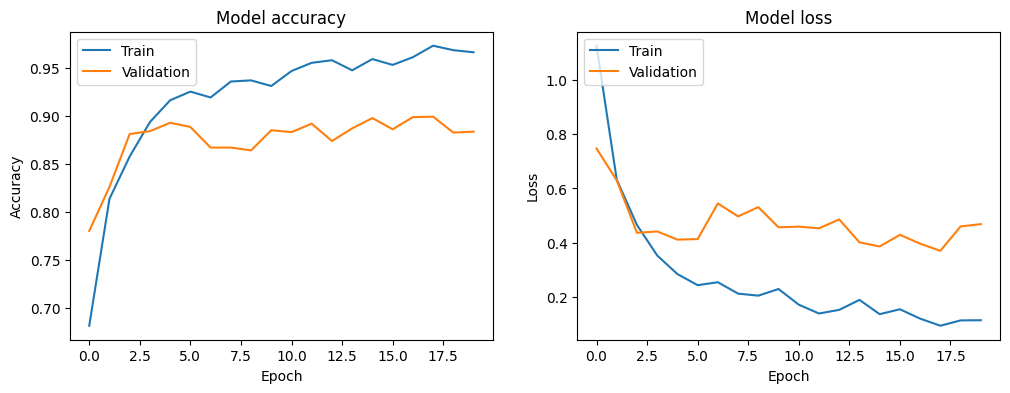

In [73]:
plot_acc_loss(postfreeze_history)

In [74]:
test_loss,test_acc , y_pred_list , y_true_list=test_loop(test_loader,vgg_model,device,criterion)
print("test loss : " + str(test_loss))
print("test accuracy : " + str(test_acc))

accuracy = 0.888671875, test_loss = 0.479404
test loss : 0.47940383839886636
test accuracy : 0.888671875


In [4]:
yolov5_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True,autoshape=False,classes = 102)
for param in yolov5_model.parameters():
    param.requires_grad = False



/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 

In [5]:
yolov5_model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3(
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
     